In [3]:
# 0. 사용할 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2, callbacks=[history])
    
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [9]:
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(5)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
                                   
img = load_img('./dataset/shape/train/triangle/triangle001.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
for batch in train_datagen.flow(x, batch_size=1, save_to_dir='./dataset/shape/preview', save_prefix='tri', save_format='png'):
    i += 1
    if i > 30: 
        break

(50, 5)
[[0.84615385 0.69230769 0.15384615 0.76923077]
 [0.69230769 0.15384615 0.76923077 0.61538462]
 [0.15384615 0.76923077 0.61538462 0.07692308]
 [0.76923077 0.61538462 0.07692308 0.53846154]
 [0.61538462 0.07692308 0.53846154 0.61538462]
 [0.07692308 0.53846154 0.61538462 0.69230769]
 [0.53846154 0.61538462 0.69230769 0.76923077]
 [0.61538462 0.69230769 0.76923077 0.84615385]
 [0.69230769 0.76923077 0.84615385 0.84615385]
 [0.76923077 0.84615385 0.84615385 0.30769231]
 [0.84615385 0.84615385 0.30769231 0.84615385]
 [0.84615385 0.30769231 0.84615385 0.69230769]
 [0.30769231 0.84615385 0.69230769 0.69230769]
 [0.84615385 0.69230769 0.69230769 0.69230769]
 [0.69230769 0.69230769 0.69230769 0.76923077]
 [0.69230769 0.69230769 0.76923077 0.61538462]
 [0.69230769 0.76923077 0.61538462 0.07692308]
 [0.76923077 0.61538462 0.07692308 0.53846154]
 [0.61538462 0.07692308 0.53846154 0.69230769]
 [0.07692308 0.53846154 0.69230769 0.84615385]
 [0.53846154 0.69230769 0.84615385 0.84615385]
 [0.6

 - 0s - loss: 1.8704 - acc: 0.3400
Epoch 57/2000
 - 0s - loss: 1.8643 - acc: 0.3400
Epoch 58/2000
 - 0s - loss: 1.8633 - acc: 0.3400
Epoch 59/2000
 - 0s - loss: 1.8649 - acc: 0.3400
Epoch 60/2000
 - 0s - loss: 1.8602 - acc: 0.3400
Epoch 61/2000
 - 0s - loss: 1.8601 - acc: 0.3400
Epoch 62/2000
 - 0s - loss: 1.8570 - acc: 0.3400
Epoch 63/2000
 - 0s - loss: 1.8569 - acc: 0.3400
Epoch 64/2000
 - 0s - loss: 1.8538 - acc: 0.3400
Epoch 65/2000
 - 0s - loss: 1.8594 - acc: 0.3400
Epoch 66/2000
 - 0s - loss: 1.8477 - acc: 0.3400
Epoch 67/2000
 - 0s - loss: 1.8535 - acc: 0.3400
Epoch 68/2000
 - 0s - loss: 1.8491 - acc: 0.3400
Epoch 69/2000
 - 0s - loss: 1.8486 - acc: 0.3400
Epoch 70/2000
 - 0s - loss: 1.8456 - acc: 0.3400
Epoch 71/2000
 - 0s - loss: 1.8459 - acc: 0.3400
Epoch 72/2000
 - 0s - loss: 1.8419 - acc: 0.3400
Epoch 73/2000
 - 0s - loss: 1.8407 - acc: 0.3400
Epoch 74/2000
 - 0s - loss: 1.8379 - acc: 0.3400
Epoch 75/2000
 - 0s - loss: 1.8335 - acc: 0.3400
Epoch 76/2000
 - 0s - loss: 1.8388

 - 0s - loss: 1.4617 - acc: 0.5000
Epoch 222/2000
 - 0s - loss: 1.4731 - acc: 0.4800
Epoch 223/2000
 - 0s - loss: 1.4744 - acc: 0.4800
Epoch 224/2000
 - 0s - loss: 1.4980 - acc: 0.4600
Epoch 225/2000
 - 0s - loss: 1.4720 - acc: 0.4400
Epoch 226/2000
 - 0s - loss: 1.4758 - acc: 0.4800
Epoch 227/2000
 - 0s - loss: 1.4668 - acc: 0.4600
Epoch 228/2000
 - 0s - loss: 1.4565 - acc: 0.5000
Epoch 229/2000
 - 0s - loss: 1.4643 - acc: 0.4800
Epoch 230/2000
 - 0s - loss: 1.4529 - acc: 0.5000
Epoch 231/2000
 - 0s - loss: 1.4613 - acc: 0.5000
Epoch 232/2000
 - 0s - loss: 1.4677 - acc: 0.5000
Epoch 233/2000
 - 0s - loss: 1.4417 - acc: 0.5200
Epoch 234/2000
 - 0s - loss: 1.4615 - acc: 0.4600
Epoch 235/2000
 - 0s - loss: 1.4480 - acc: 0.5000
Epoch 236/2000
 - 0s - loss: 1.4382 - acc: 0.5200
Epoch 237/2000
 - 0s - loss: 1.4497 - acc: 0.4800
Epoch 238/2000
 - 0s - loss: 1.4378 - acc: 0.5000
Epoch 239/2000
 - 0s - loss: 1.4364 - acc: 0.5200
Epoch 240/2000
 - 0s - loss: 1.4321 - acc: 0.5000
Epoch 241/2000


 - 0s - loss: 1.2000 - acc: 0.5600
Epoch 386/2000
 - 0s - loss: 1.1747 - acc: 0.5200
Epoch 387/2000
 - 0s - loss: 1.2121 - acc: 0.5800
Epoch 388/2000
 - 0s - loss: 1.1916 - acc: 0.5600
Epoch 389/2000
 - 0s - loss: 1.2261 - acc: 0.5000
Epoch 390/2000
 - 0s - loss: 1.1894 - acc: 0.5600
Epoch 391/2000
 - 0s - loss: 1.1846 - acc: 0.5800
Epoch 392/2000
 - 0s - loss: 1.1801 - acc: 0.5800
Epoch 393/2000
 - 0s - loss: 1.1765 - acc: 0.5400
Epoch 394/2000
 - 0s - loss: 1.1819 - acc: 0.5200
Epoch 395/2000
 - 0s - loss: 1.2069 - acc: 0.5600
Epoch 396/2000
 - 0s - loss: 1.1746 - acc: 0.5400
Epoch 397/2000
 - 0s - loss: 1.2000 - acc: 0.5800
Epoch 398/2000
 - 0s - loss: 1.1817 - acc: 0.5200
Epoch 399/2000
 - 0s - loss: 1.1785 - acc: 0.5800
Epoch 400/2000
 - 0s - loss: 1.1700 - acc: 0.5800
Epoch 401/2000
 - 0s - loss: 1.1681 - acc: 0.5600
Epoch 402/2000
 - 0s - loss: 1.1640 - acc: 0.5600
Epoch 403/2000
 - 0s - loss: 1.1603 - acc: 0.5800
Epoch 404/2000
 - 0s - loss: 1.1781 - acc: 0.5200
Epoch 405/2000


 - 0s - loss: 0.9072 - acc: 0.6800
Epoch 550/2000
 - 0s - loss: 0.9172 - acc: 0.6000
Epoch 551/2000
 - 0s - loss: 0.9317 - acc: 0.5800
Epoch 552/2000
 - 0s - loss: 0.9120 - acc: 0.6400
Epoch 553/2000
 - 0s - loss: 0.9048 - acc: 0.5800
Epoch 554/2000
 - 0s - loss: 0.9169 - acc: 0.6800
Epoch 555/2000
 - 0s - loss: 0.8993 - acc: 0.6400
Epoch 556/2000
 - 0s - loss: 0.8959 - acc: 0.6000
Epoch 557/2000
 - 0s - loss: 0.9008 - acc: 0.6600
Epoch 558/2000
 - 0s - loss: 0.9067 - acc: 0.6000
Epoch 559/2000
 - 0s - loss: 0.8904 - acc: 0.6400
Epoch 560/2000
 - 0s - loss: 0.8987 - acc: 0.6000
Epoch 561/2000
 - 0s - loss: 0.8910 - acc: 0.6200
Epoch 562/2000
 - 0s - loss: 0.8930 - acc: 0.6600
Epoch 563/2000
 - 0s - loss: 0.8906 - acc: 0.6400
Epoch 564/2000
 - 0s - loss: 0.8777 - acc: 0.7000
Epoch 565/2000
 - 0s - loss: 0.8858 - acc: 0.6400
Epoch 566/2000
 - 0s - loss: 0.8971 - acc: 0.6200
Epoch 567/2000
 - 0s - loss: 0.9028 - acc: 0.6400
Epoch 568/2000
 - 0s - loss: 0.8959 - acc: 0.6800
Epoch 569/2000


 - 0s - loss: 0.6567 - acc: 0.7800
Epoch 714/2000
 - 0s - loss: 0.6770 - acc: 0.7200
Epoch 715/2000
 - 0s - loss: 0.6759 - acc: 0.7400
Epoch 716/2000
 - 0s - loss: 0.6656 - acc: 0.7600
Epoch 717/2000
 - 0s - loss: 0.6555 - acc: 0.8000
Epoch 718/2000
 - 0s - loss: 0.6645 - acc: 0.8000
Epoch 719/2000
 - 0s - loss: 0.6537 - acc: 0.7800
Epoch 720/2000
 - 0s - loss: 0.6699 - acc: 0.8200
Epoch 721/2000
 - 0s - loss: 0.6571 - acc: 0.7400
Epoch 722/2000
 - 0s - loss: 0.6521 - acc: 0.7600
Epoch 723/2000
 - 0s - loss: 0.6527 - acc: 0.7800
Epoch 724/2000
 - 0s - loss: 0.6490 - acc: 0.7600
Epoch 725/2000
 - 0s - loss: 0.6523 - acc: 0.8000
Epoch 726/2000
 - 0s - loss: 0.6570 - acc: 0.8000
Epoch 727/2000
 - 0s - loss: 0.6574 - acc: 0.7600
Epoch 728/2000
 - 0s - loss: 0.6574 - acc: 0.7800
Epoch 729/2000
 - 0s - loss: 0.6427 - acc: 0.8200
Epoch 730/2000
 - 0s - loss: 0.6544 - acc: 0.8000
Epoch 731/2000
 - 0s - loss: 0.6516 - acc: 0.7800
Epoch 732/2000
 - 0s - loss: 0.6444 - acc: 0.8000
Epoch 733/2000


 - 0s - loss: 0.5816 - acc: 0.7800
Epoch 878/2000
 - 0s - loss: 0.5601 - acc: 0.7600
Epoch 879/2000
 - 0s - loss: 0.5419 - acc: 0.7800
Epoch 880/2000
 - 0s - loss: 0.5252 - acc: 0.8200
Epoch 881/2000
 - 0s - loss: 0.5503 - acc: 0.8200
Epoch 882/2000
 - 0s - loss: 0.5470 - acc: 0.8000
Epoch 883/2000
 - 0s - loss: 0.5277 - acc: 0.8200
Epoch 884/2000
 - 0s - loss: 0.5407 - acc: 0.8400
Epoch 885/2000
 - 0s - loss: 0.5348 - acc: 0.8200
Epoch 886/2000
 - 0s - loss: 0.5275 - acc: 0.8200
Epoch 887/2000
 - 0s - loss: 0.5391 - acc: 0.8200
Epoch 888/2000
 - 0s - loss: 0.5129 - acc: 0.8200
Epoch 889/2000
 - 0s - loss: 0.5169 - acc: 0.8200
Epoch 890/2000
 - 0s - loss: 0.5209 - acc: 0.8000
Epoch 891/2000
 - 0s - loss: 0.5461 - acc: 0.8000
Epoch 892/2000
 - 0s - loss: 0.5008 - acc: 0.8200
Epoch 893/2000
 - 0s - loss: 0.5535 - acc: 0.7800
Epoch 894/2000
 - 0s - loss: 0.5285 - acc: 0.8200
Epoch 895/2000
 - 0s - loss: 0.5309 - acc: 0.8400
Epoch 896/2000
 - 0s - loss: 0.5199 - acc: 0.8200
Epoch 897/2000


Epoch 1041/2000
 - 0s - loss: 0.4515 - acc: 0.8400
Epoch 1042/2000
 - 0s - loss: 0.4542 - acc: 0.8400
Epoch 1043/2000
 - 0s - loss: 0.4494 - acc: 0.8600
Epoch 1044/2000
 - 0s - loss: 0.4548 - acc: 0.8600
Epoch 1045/2000
 - 0s - loss: 0.4439 - acc: 0.8400
Epoch 1046/2000
 - 0s - loss: 0.4522 - acc: 0.8600
Epoch 1047/2000
 - 0s - loss: 0.4540 - acc: 0.8200
Epoch 1048/2000
 - 0s - loss: 0.4478 - acc: 0.8400
Epoch 1049/2000
 - 0s - loss: 0.4576 - acc: 0.8400
Epoch 1050/2000
 - 0s - loss: 0.4663 - acc: 0.8200
Epoch 1051/2000
 - 0s - loss: 0.4470 - acc: 0.8400
Epoch 1052/2000
 - 0s - loss: 0.4517 - acc: 0.8400
Epoch 1053/2000
 - 0s - loss: 0.4593 - acc: 0.8200
Epoch 1054/2000
 - 0s - loss: 0.4651 - acc: 0.8200
Epoch 1055/2000
 - 0s - loss: 0.4342 - acc: 0.8600
Epoch 1056/2000
 - 0s - loss: 0.4975 - acc: 0.8400
Epoch 1057/2000
 - 0s - loss: 0.4526 - acc: 0.8200
Epoch 1058/2000
 - 0s - loss: 0.4309 - acc: 0.8400
Epoch 1059/2000
 - 0s - loss: 0.4567 - acc: 0.8600
Epoch 1060/2000
 - 0s - loss: 0

Epoch 1202/2000
 - 0s - loss: 0.4066 - acc: 0.8400
Epoch 1203/2000
 - 0s - loss: 0.3900 - acc: 0.8600
Epoch 1204/2000
 - 0s - loss: 0.3961 - acc: 0.8800
Epoch 1205/2000
 - 0s - loss: 0.3952 - acc: 0.8600
Epoch 1206/2000
 - 0s - loss: 0.3871 - acc: 0.8600
Epoch 1207/2000
 - 0s - loss: 0.4100 - acc: 0.8600
Epoch 1208/2000
 - 0s - loss: 0.3929 - acc: 0.8200
Epoch 1209/2000
 - 0s - loss: 0.4061 - acc: 0.8600
Epoch 1210/2000
 - 0s - loss: 0.3806 - acc: 0.8600
Epoch 1211/2000
 - 0s - loss: 0.4531 - acc: 0.8000
Epoch 1212/2000
 - 0s - loss: 0.4049 - acc: 0.8800
Epoch 1213/2000
 - 0s - loss: 0.4195 - acc: 0.8400
Epoch 1214/2000
 - 0s - loss: 0.4695 - acc: 0.8000
Epoch 1215/2000
 - 0s - loss: 0.3890 - acc: 0.8600
Epoch 1216/2000
 - 0s - loss: 0.4068 - acc: 0.8800
Epoch 1217/2000
 - 0s - loss: 0.4065 - acc: 0.8600
Epoch 1218/2000
 - 0s - loss: 0.4172 - acc: 0.8400
Epoch 1219/2000
 - 0s - loss: 0.4117 - acc: 0.8600
Epoch 1220/2000
 - 0s - loss: 0.3798 - acc: 0.8600
Epoch 1221/2000
 - 0s - loss: 0

Epoch 1363/2000
 - 0s - loss: 0.3693 - acc: 0.8400
Epoch 1364/2000
 - 0s - loss: 0.3579 - acc: 0.8600
Epoch 1365/2000
 - 0s - loss: 0.3593 - acc: 0.8600
Epoch 1366/2000
 - 0s - loss: 0.3525 - acc: 0.8600
Epoch 1367/2000
 - 0s - loss: 0.3525 - acc: 0.8800
Epoch 1368/2000
 - 0s - loss: 0.3490 - acc: 0.8800
Epoch 1369/2000
 - 0s - loss: 0.3555 - acc: 0.8400
Epoch 1370/2000
 - 0s - loss: 0.3523 - acc: 0.8400
Epoch 1371/2000
 - 0s - loss: 0.3563 - acc: 0.8600
Epoch 1372/2000
 - 0s - loss: 0.3599 - acc: 0.8600
Epoch 1373/2000
 - 0s - loss: 0.3527 - acc: 0.8600
Epoch 1374/2000
 - 0s - loss: 0.3651 - acc: 0.8600
Epoch 1375/2000
 - 0s - loss: 0.3672 - acc: 0.8200
Epoch 1376/2000
 - 0s - loss: 0.3500 - acc: 0.8600
Epoch 1377/2000
 - 0s - loss: 0.3620 - acc: 0.8400
Epoch 1378/2000
 - 0s - loss: 0.3566 - acc: 0.8200
Epoch 1379/2000
 - 0s - loss: 0.3626 - acc: 0.8600
Epoch 1380/2000
 - 0s - loss: 0.3537 - acc: 0.8400
Epoch 1381/2000
 - 0s - loss: 0.3510 - acc: 0.8400
Epoch 1382/2000
 - 0s - loss: 0

Epoch 1524/2000
 - 0s - loss: 0.3315 - acc: 0.8600
Epoch 1525/2000
 - 0s - loss: 0.3352 - acc: 0.8600
Epoch 1526/2000
 - 0s - loss: 0.3214 - acc: 0.8800
Epoch 1527/2000
 - 0s - loss: 0.3340 - acc: 0.8600
Epoch 1528/2000
 - 0s - loss: 0.3326 - acc: 0.8800
Epoch 1529/2000
 - 0s - loss: 0.3249 - acc: 0.8800
Epoch 1530/2000
 - 0s - loss: 0.3383 - acc: 0.8800
Epoch 1531/2000
 - 0s - loss: 0.3328 - acc: 0.8400
Epoch 1532/2000
 - 0s - loss: 0.3327 - acc: 0.8800
Epoch 1533/2000
 - 0s - loss: 0.3412 - acc: 0.8600
Epoch 1534/2000
 - 0s - loss: 0.3357 - acc: 0.8600
Epoch 1535/2000
 - 0s - loss: 0.3309 - acc: 0.8800
Epoch 1536/2000
 - 0s - loss: 0.3237 - acc: 0.8600
Epoch 1537/2000
 - 0s - loss: 0.3301 - acc: 0.8600
Epoch 1538/2000
 - 0s - loss: 0.3323 - acc: 0.8600
Epoch 1539/2000
 - 0s - loss: 0.3327 - acc: 0.8400
Epoch 1540/2000
 - 0s - loss: 0.3405 - acc: 0.8600
Epoch 1541/2000
 - 0s - loss: 0.3338 - acc: 0.8800
Epoch 1542/2000
 - 0s - loss: 0.3268 - acc: 0.8600
Epoch 1543/2000
 - 0s - loss: 0

Epoch 1685/2000
 - 0s - loss: 0.3144 - acc: 0.8800
Epoch 1686/2000
 - 0s - loss: 0.3110 - acc: 0.8600
Epoch 1687/2000
 - 0s - loss: 0.3241 - acc: 0.8400
Epoch 1688/2000
 - 0s - loss: 0.3442 - acc: 0.8600
Epoch 1689/2000
 - 0s - loss: 0.3010 - acc: 0.8600
Epoch 1690/2000
 - 0s - loss: 0.3325 - acc: 0.8800
Epoch 1691/2000
 - 0s - loss: 0.3122 - acc: 0.8400
Epoch 1692/2000
 - 0s - loss: 0.3104 - acc: 0.8800
Epoch 1693/2000
 - 0s - loss: 0.3146 - acc: 0.8400
Epoch 1694/2000
 - 0s - loss: 0.3231 - acc: 0.8200
Epoch 1695/2000
 - 0s - loss: 0.3215 - acc: 0.8600
Epoch 1696/2000
 - 0s - loss: 0.3104 - acc: 0.8400
Epoch 1697/2000
 - 0s - loss: 0.3087 - acc: 0.8600
Epoch 1698/2000
 - 0s - loss: 0.3134 - acc: 0.8800
Epoch 1699/2000
 - 0s - loss: 0.3138 - acc: 0.8800
Epoch 1700/2000
 - 0s - loss: 0.3086 - acc: 0.8600
Epoch 1701/2000
 - 0s - loss: 0.3263 - acc: 0.8400
Epoch 1702/2000
 - 0s - loss: 0.3067 - acc: 0.8800
Epoch 1703/2000
 - 0s - loss: 0.3264 - acc: 0.8800
Epoch 1704/2000
 - 0s - loss: 0

Epoch 1846/2000
 - 0s - loss: 0.3023 - acc: 0.8400
Epoch 1847/2000
 - 0s - loss: 0.3121 - acc: 0.8400
Epoch 1848/2000
 - 0s - loss: 0.2999 - acc: 0.8800
Epoch 1849/2000
 - 0s - loss: 0.3112 - acc: 0.8800
Epoch 1850/2000
 - 0s - loss: 0.3020 - acc: 0.8800
Epoch 1851/2000
 - 0s - loss: 0.3069 - acc: 0.8800
Epoch 1852/2000
 - 0s - loss: 0.3009 - acc: 0.8400
Epoch 1853/2000
 - 0s - loss: 0.2950 - acc: 0.8400
Epoch 1854/2000
 - 0s - loss: 0.3146 - acc: 0.8600
Epoch 1855/2000
 - 0s - loss: 0.2978 - acc: 0.8400
Epoch 1856/2000
 - 0s - loss: 0.2948 - acc: 0.8600
Epoch 1857/2000
 - 0s - loss: 0.2974 - acc: 0.8800
Epoch 1858/2000
 - 0s - loss: 0.2946 - acc: 0.8800
Epoch 1859/2000
 - 0s - loss: 0.3090 - acc: 0.8600
Epoch 1860/2000
 - 0s - loss: 0.2993 - acc: 0.8600
Epoch 1861/2000
 - 0s - loss: 0.3093 - acc: 0.8600
Epoch 1862/2000
 - 0s - loss: 0.3181 - acc: 0.8400
Epoch 1863/2000
 - 0s - loss: 0.3003 - acc: 0.8600
Epoch 1864/2000
 - 0s - loss: 0.3027 - acc: 0.8600
Epoch 1865/2000
 - 0s - loss: 0

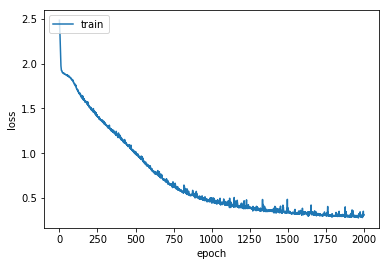

50/50 [==============================] - 0s 5ms/step
acc: 90.00%
one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


In [12]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

# 1. 데이터 준비하기
        
# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
print(x_train)
x_train = np.reshape(x_train, (50, 4, 1))
print(x_train)

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))

# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=14, verbose=2, callbacks=[history])

# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

In [ ]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)        

# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))
    
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성

history.init()

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()
    
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

model.reset_states()
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

model.reset_states()
    
print("full song prediction : ", seq_out)

one hot encoding vector size is  12
epochs : 0
Epoch 1/1
 - 1s - loss: 2.3079 - acc: 0.1400
epochs : 1
Epoch 1/1
 - 0s - loss: 2.0178 - acc: 0.3400
epochs : 2
Epoch 1/1
 - 0s - loss: 1.9622 - acc: 0.3400
epochs : 3
Epoch 1/1
 - 0s - loss: 1.9463 - acc: 0.3400
epochs : 4
Epoch 1/1
 - 0s - loss: 1.9361 - acc: 0.3400
epochs : 5
Epoch 1/1
 - 0s - loss: 1.9286 - acc: 0.3400
epochs : 6
Epoch 1/1
 - 0s - loss: 1.9227 - acc: 0.3400
epochs : 7
Epoch 1/1
 - 0s - loss: 1.9174 - acc: 0.3400
epochs : 8
Epoch 1/1
 - 0s - loss: 1.9126 - acc: 0.3600
epochs : 9
Epoch 1/1
 - 0s - loss: 1.9078 - acc: 0.3600
epochs : 10
Epoch 1/1
 - 0s - loss: 1.9023 - acc: 0.3600
epochs : 11
Epoch 1/1
 - 0s - loss: 1.8949 - acc: 0.3600
epochs : 12
Epoch 1/1
 - 0s - loss: 1.8832 - acc: 0.3600
epochs : 13
Epoch 1/1
 - 0s - loss: 1.8691 - acc: 0.3600
epochs : 14
Epoch 1/1
 - 0s - loss: 1.8556 - acc: 0.3600
epochs : 15
Epoch 1/1
 - 0s - loss: 1.8407 - acc: 0.3600
epochs : 16
Epoch 1/1
 - 0s - loss: 1.8253 - acc: 0.3800
epoch

epochs : 143
Epoch 1/1
 - 0s - loss: 0.0051 - acc: 1.0000
epochs : 144
Epoch 1/1
 - 0s - loss: 0.0049 - acc: 1.0000
epochs : 145
Epoch 1/1
 - 0s - loss: 0.0046 - acc: 1.0000
epochs : 146
Epoch 1/1
 - 0s - loss: 0.0044 - acc: 1.0000
epochs : 147
Epoch 1/1
 - 0s - loss: 0.0042 - acc: 1.0000
epochs : 148
Epoch 1/1
 - 0s - loss: 0.0040 - acc: 1.0000
epochs : 149
Epoch 1/1
 - 0s - loss: 0.0039 - acc: 1.0000
epochs : 150
Epoch 1/1
 - 0s - loss: 0.0037 - acc: 1.0000
epochs : 151
Epoch 1/1
 - 0s - loss: 0.0036 - acc: 1.0000
epochs : 152
Epoch 1/1
 - 0s - loss: 0.0035 - acc: 1.0000
epochs : 153
Epoch 1/1
 - 0s - loss: 0.0033 - acc: 1.0000
epochs : 154
Epoch 1/1
 - 0s - loss: 0.0032 - acc: 1.0000
epochs : 155
Epoch 1/1
 - 0s - loss: 0.0031 - acc: 1.0000
epochs : 156
Epoch 1/1
 - 0s - loss: 0.0030 - acc: 1.0000
epochs : 157
Epoch 1/1
 - 0s - loss: 0.0029 - acc: 1.0000
epochs : 158
Epoch 1/1
 - 0s - loss: 0.0028 - acc: 1.0000
epochs : 159
Epoch 1/1
 - 0s - loss: 0.0027 - acc: 1.0000
epochs : 160
E

 - 0s - loss: 0.0699 - acc: 1.0000
epochs : 282
Epoch 1/1
 - 0s - loss: 0.0483 - acc: 1.0000
epochs : 283
Epoch 1/1
 - 0s - loss: 0.0379 - acc: 1.0000
epochs : 284
Epoch 1/1
 - 0s - loss: 0.0302 - acc: 1.0000
epochs : 285
Epoch 1/1
 - 0s - loss: 0.0280 - acc: 1.0000
epochs : 286
Epoch 1/1
 - 0s - loss: 0.0255 - acc: 1.0000
epochs : 287
Epoch 1/1
 - 0s - loss: 0.0226 - acc: 1.0000
epochs : 288
Epoch 1/1
 - 0s - loss: 0.0203 - acc: 1.0000
epochs : 289
Epoch 1/1
 - 0s - loss: 0.0181 - acc: 1.0000
epochs : 290
Epoch 1/1
 - 0s - loss: 0.0154 - acc: 1.0000
epochs : 291
Epoch 1/1
 - 0s - loss: 0.0134 - acc: 1.0000
epochs : 292
Epoch 1/1
 - 0s - loss: 0.0120 - acc: 1.0000
epochs : 293
Epoch 1/1
 - 0s - loss: 0.0109 - acc: 1.0000
epochs : 294
Epoch 1/1
 - 0s - loss: 0.0101 - acc: 1.0000
epochs : 295
Epoch 1/1
 - 0s - loss: 0.0094 - acc: 1.0000
epochs : 296
Epoch 1/1
 - 0s - loss: 0.0088 - acc: 1.0000
epochs : 297
Epoch 1/1
 - 0s - loss: 0.0082 - acc: 1.0000
epochs : 298
Epoch 1/1
 - 0s - loss: 

 - 0s - loss: 0.3772 - acc: 0.8600
epochs : 420
Epoch 1/1
 - 0s - loss: 0.2549 - acc: 0.9200
epochs : 421
Epoch 1/1
 - 0s - loss: 0.5582 - acc: 0.8200
epochs : 422
Epoch 1/1
 - 0s - loss: 0.6288 - acc: 0.7800
epochs : 423
Epoch 1/1
 - 0s - loss: 0.2452 - acc: 0.9200
epochs : 424
Epoch 1/1
 - 0s - loss: 0.1356 - acc: 1.0000
epochs : 425
Epoch 1/1
 - 0s - loss: 0.1121 - acc: 0.9800
epochs : 426
Epoch 1/1
 - 0s - loss: 0.1078 - acc: 0.9800
epochs : 427
Epoch 1/1
 - 0s - loss: 0.0809 - acc: 1.0000
epochs : 428
Epoch 1/1
 - 0s - loss: 0.0781 - acc: 0.9800
epochs : 429
Epoch 1/1
 - 0s - loss: 0.0679 - acc: 1.0000
epochs : 430
Epoch 1/1
 - 0s - loss: 0.0634 - acc: 1.0000
epochs : 431
Epoch 1/1
 - 0s - loss: 0.0434 - acc: 1.0000
epochs : 432
Epoch 1/1
 - 0s - loss: 0.0733 - acc: 0.9800
epochs : 433
Epoch 1/1
 - 0s - loss: 0.2353 - acc: 0.8800
epochs : 434
Epoch 1/1
 - 0s - loss: 0.1317 - acc: 0.9800
epochs : 435
Epoch 1/1
 - 0s - loss: 0.0878 - acc: 0.9800
epochs : 436
Epoch 1/1
 - 0s - loss: 

epochs : 561
Epoch 1/1
 - 0s - loss: 0.0039 - acc: 1.0000
epochs : 562
Epoch 1/1
 - 0s - loss: 0.0037 - acc: 1.0000
epochs : 563
Epoch 1/1
 - 0s - loss: 0.0036 - acc: 1.0000
epochs : 564
Epoch 1/1
 - 0s - loss: 0.0034 - acc: 1.0000
epochs : 565
Epoch 1/1
 - 0s - loss: 0.0033 - acc: 1.0000
epochs : 566
Epoch 1/1
 - 0s - loss: 0.0033 - acc: 1.0000
epochs : 567
Epoch 1/1
 - 0s - loss: 0.0031 - acc: 1.0000
epochs : 568
Epoch 1/1
 - 0s - loss: 0.0031 - acc: 1.0000
epochs : 569
Epoch 1/1
 - 0s - loss: 0.0030 - acc: 1.0000
epochs : 570
Epoch 1/1
 - 0s - loss: 0.0029 - acc: 1.0000
epochs : 571
Epoch 1/1
 - 0s - loss: 0.0028 - acc: 1.0000
epochs : 572
Epoch 1/1
 - 0s - loss: 0.0027 - acc: 1.0000
epochs : 573
Epoch 1/1
 - 0s - loss: 0.0026 - acc: 1.0000
epochs : 574
Epoch 1/1
 - 0s - loss: 0.0025 - acc: 1.0000
epochs : 575
Epoch 1/1
 - 0s - loss: 0.0024 - acc: 1.0000
epochs : 576
Epoch 1/1
 - 0s - loss: 0.0023 - acc: 1.0000
epochs : 577
Epoch 1/1
 - 0s - loss: 0.0023 - acc: 1.0000
epochs : 578
E

epochs : 700
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 701
Epoch 1/1
 - 0s - loss: 0.0036 - acc: 1.0000
epochs : 702
Epoch 1/1
 - 0s - loss: 0.0044 - acc: 1.0000
epochs : 703
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 704
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 705
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 706
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 707
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 708
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 709
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 710
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 711
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 712
Epoch 1/1
 - 0s - loss: 9.9333e-04 - acc: 1.0000
epochs : 713
Epoch 1/1
 - 0s - loss: 9.9160e-04 - acc: 1.0000
epochs : 714
Epoch 1/1
 - 0s - loss: 9.0974e-04 - acc: 1.0000
epochs : 715
Epoch 1/1
 - 0s - loss: 8.8633e-04 - acc: 1.0000
epochs : 716
Epoch 1/1
 - 0s - loss: 8.3402e-04 - acc: 1

epochs : 836
Epoch 1/1
 - 0s - loss: 0.0025 - acc: 1.0000
epochs : 837
Epoch 1/1
 - 0s - loss: 0.0024 - acc: 1.0000
epochs : 838
Epoch 1/1
 - 0s - loss: 0.0023 - acc: 1.0000
epochs : 839
Epoch 1/1
 - 0s - loss: 0.0022 - acc: 1.0000
epochs : 840
Epoch 1/1
 - 0s - loss: 0.0021 - acc: 1.0000
epochs : 841
Epoch 1/1
 - 0s - loss: 0.0020 - acc: 1.0000
epochs : 842
Epoch 1/1
 - 0s - loss: 0.0019 - acc: 1.0000
epochs : 843
Epoch 1/1
 - 0s - loss: 0.0018 - acc: 1.0000
epochs : 844
Epoch 1/1
 - 0s - loss: 0.0016 - acc: 1.0000
epochs : 845
Epoch 1/1
 - 0s - loss: 0.0016 - acc: 1.0000
epochs : 846
Epoch 1/1
 - 0s - loss: 0.0015 - acc: 1.0000
epochs : 847
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 848
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 849
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 850
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 851
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 852
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 853
E

 - 0s - loss: 0.0018 - acc: 1.0000
epochs : 975
Epoch 1/1
 - 0s - loss: 0.0017 - acc: 1.0000
epochs : 976
Epoch 1/1
 - 0s - loss: 0.0017 - acc: 1.0000
epochs : 977
Epoch 1/1
 - 0s - loss: 0.0016 - acc: 1.0000
epochs : 978
Epoch 1/1
 - 0s - loss: 0.0016 - acc: 1.0000
epochs : 979
Epoch 1/1
 - 0s - loss: 0.0015 - acc: 1.0000
epochs : 980
Epoch 1/1
 - 0s - loss: 0.0015 - acc: 1.0000
epochs : 981
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 982
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 983
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 984
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 985
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 986
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 987
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 988
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 989
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 990
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 991
Epoch 1/1
 - 0s - loss: 

epochs : 1110
Epoch 1/1
 - 0s - loss: 5.5580e-04 - acc: 1.0000
epochs : 1111
Epoch 1/1
 - 0s - loss: 5.3783e-04 - acc: 1.0000
epochs : 1112
Epoch 1/1
 - 0s - loss: 5.2115e-04 - acc: 1.0000
epochs : 1113
Epoch 1/1
 - 0s - loss: 5.0522e-04 - acc: 1.0000
epochs : 1114
Epoch 1/1
 - 0s - loss: 4.8975e-04 - acc: 1.0000
epochs : 1115
Epoch 1/1
 - 0s - loss: 4.7472e-04 - acc: 1.0000
epochs : 1116
Epoch 1/1
 - 0s - loss: 4.6061e-04 - acc: 1.0000
epochs : 1117
Epoch 1/1
 - 0s - loss: 4.4665e-04 - acc: 1.0000
epochs : 1118
Epoch 1/1
 - 0s - loss: 4.3371e-04 - acc: 1.0000
epochs : 1119
Epoch 1/1
 - 0s - loss: 4.2159e-04 - acc: 1.0000
epochs : 1120
Epoch 1/1
 - 0s - loss: 4.0971e-04 - acc: 1.0000
epochs : 1121
Epoch 1/1
 - 0s - loss: 3.9824e-04 - acc: 1.0000
epochs : 1122
Epoch 1/1
 - 0s - loss: 3.8697e-04 - acc: 1.0000
epochs : 1123
Epoch 1/1
 - 0s - loss: 3.7636e-04 - acc: 1.0000
epochs : 1124
Epoch 1/1
 - 0s - loss: 3.6596e-04 - acc: 1.0000
epochs : 1125
Epoch 1/1
 - 0s - loss: 3.5600e-04 - acc:

 - 0s - loss: 1.4765e-05 - acc: 1.0000
epochs : 1241
Epoch 1/1
 - 0s - loss: 1.4384e-05 - acc: 1.0000
epochs : 1242
Epoch 1/1
 - 0s - loss: 1.3992e-05 - acc: 1.0000
epochs : 1243
Epoch 1/1
 - 0s - loss: 1.3613e-05 - acc: 1.0000
epochs : 1244
Epoch 1/1
 - 0s - loss: 1.3265e-05 - acc: 1.0000
epochs : 1245
Epoch 1/1
 - 0s - loss: 1.2934e-05 - acc: 1.0000
epochs : 1246
Epoch 1/1
 - 0s - loss: 1.2622e-05 - acc: 1.0000
epochs : 1247
Epoch 1/1
 - 0s - loss: 1.2320e-05 - acc: 1.0000
epochs : 1248
Epoch 1/1
 - 0s - loss: 1.2019e-05 - acc: 1.0000
epochs : 1249
Epoch 1/1
 - 0s - loss: 1.1729e-05 - acc: 1.0000
epochs : 1250
Epoch 1/1
 - 0s - loss: 1.1456e-05 - acc: 1.0000
epochs : 1251
Epoch 1/1
 - 0s - loss: 1.1187e-05 - acc: 1.0000
epochs : 1252
Epoch 1/1
 - 0s - loss: 1.0922e-05 - acc: 1.0000
epochs : 1253
Epoch 1/1
 - 0s - loss: 1.0659e-05 - acc: 1.0000
epochs : 1254
Epoch 1/1
 - 0s - loss: 1.0400e-05 - acc: 1.0000
epochs : 1255
Epoch 1/1
 - 0s - loss: 1.0139e-05 - acc: 1.0000
epochs : 1256
Ep

epochs : 1371
Epoch 1/1
 - 0s - loss: 5.9009e-07 - acc: 1.0000
epochs : 1372
Epoch 1/1
 - 0s - loss: 5.6982e-07 - acc: 1.0000
epochs : 1373
Epoch 1/1
 - 0s - loss: 5.5671e-07 - acc: 1.0000
epochs : 1374
Epoch 1/1
 - 0s - loss: 5.4836e-07 - acc: 1.0000
epochs : 1375
Epoch 1/1
 - 0s - loss: 5.3883e-07 - acc: 1.0000
epochs : 1376
Epoch 1/1
 - 0s - loss: 5.3167e-07 - acc: 1.0000
epochs : 1377
Epoch 1/1
 - 0s - loss: 5.0783e-07 - acc: 1.0000
epochs : 1378
Epoch 1/1
 - 0s - loss: 4.9949e-07 - acc: 1.0000
epochs : 1379
Epoch 1/1
 - 0s - loss: 4.8041e-07 - acc: 1.0000
epochs : 1380
Epoch 1/1
 - 0s - loss: 4.7922e-07 - acc: 1.0000
epochs : 1381
Epoch 1/1
 - 0s - loss: 4.6134e-07 - acc: 1.0000
epochs : 1382
Epoch 1/1
 - 0s - loss: 4.5538e-07 - acc: 1.0000
epochs : 1383
Epoch 1/1
 - 0s - loss: 4.3154e-07 - acc: 1.0000
epochs : 1384
Epoch 1/1
 - 0s - loss: 4.2081e-07 - acc: 1.0000
epochs : 1385
Epoch 1/1
 - 0s - loss: 4.1485e-07 - acc: 1.0000
epochs : 1386
Epoch 1/1
 - 0s - loss: 4.0293e-07 - acc:

epochs : 1507
Epoch 1/1
 - 0s - loss: 0.0055 - acc: 1.0000
epochs : 1508
Epoch 1/1
 - 0s - loss: 0.0051 - acc: 1.0000
epochs : 1509
Epoch 1/1
 - 0s - loss: 0.0047 - acc: 1.0000
epochs : 1510
Epoch 1/1
 - 0s - loss: 0.0043 - acc: 1.0000
epochs : 1511
Epoch 1/1
 - 0s - loss: 0.0040 - acc: 1.0000
epochs : 1512
Epoch 1/1
 - 0s - loss: 0.0038 - acc: 1.0000
epochs : 1513
Epoch 1/1
 - 0s - loss: 0.0035 - acc: 1.0000
epochs : 1514
Epoch 1/1
 - 0s - loss: 0.0033 - acc: 1.0000
epochs : 1515
Epoch 1/1
 - 0s - loss: 0.0031 - acc: 1.0000
epochs : 1516
Epoch 1/1
 - 0s - loss: 0.0029 - acc: 1.0000
epochs : 1517
Epoch 1/1
 - 0s - loss: 0.0027 - acc: 1.0000
epochs : 1518
Epoch 1/1
 - 0s - loss: 0.0026 - acc: 1.0000
epochs : 1519
Epoch 1/1
 - 0s - loss: 0.0024 - acc: 1.0000
epochs : 1520
Epoch 1/1
 - 0s - loss: 0.0023 - acc: 1.0000
epochs : 1521
Epoch 1/1
 - 0s - loss: 0.0022 - acc: 1.0000
epochs : 1522
Epoch 1/1
 - 0s - loss: 0.0020 - acc: 1.0000
epochs : 1523
Epoch 1/1
 - 0s - loss: 0.0019 - acc: 1.00

 - 0s - loss: 6.8251e-05 - acc: 1.0000
epochs : 1640
Epoch 1/1
 - 0s - loss: 6.5270e-05 - acc: 1.0000
epochs : 1641
Epoch 1/1
 - 0s - loss: 6.1595e-05 - acc: 1.0000
epochs : 1642
Epoch 1/1
 - 0s - loss: 5.8170e-05 - acc: 1.0000
epochs : 1643
Epoch 1/1
 - 0s - loss: 5.5303e-05 - acc: 1.0000
epochs : 1644
Epoch 1/1
 - 0s - loss: 5.2485e-05 - acc: 1.0000
epochs : 1645
Epoch 1/1
 - 0s - loss: 4.9640e-05 - acc: 1.0000
epochs : 1646
Epoch 1/1
 - 0s - loss: 4.7216e-05 - acc: 1.0000
epochs : 1647
Epoch 1/1
 - 0s - loss: 4.5496e-05 - acc: 1.0000
epochs : 1648
Epoch 1/1
 - 0s - loss: 4.4038e-05 - acc: 1.0000
epochs : 1649
Epoch 1/1
 - 0s - loss: 4.3141e-05 - acc: 1.0000
epochs : 1650
Epoch 1/1
 - 0s - loss: 4.1977e-05 - acc: 1.0000
epochs : 1651
Epoch 1/1
 - 0s - loss: 4.0055e-05 - acc: 1.0000
epochs : 1652
Epoch 1/1
 - 0s - loss: 3.8581e-05 - acc: 1.0000
epochs : 1653
Epoch 1/1
 - 0s - loss: 3.7110e-05 - acc: 1.0000
epochs : 1654
Epoch 1/1
 - 0s - loss: 3.5795e-05 - acc: 1.0000
epochs : 1655
Ep

epochs : 1770
Epoch 1/1
 - 0s - loss: 1.7166e-06 - acc: 1.0000
epochs : 1771
Epoch 1/1
 - 0s - loss: 1.7643e-06 - acc: 1.0000
epochs : 1772
Epoch 1/1
 - 0s - loss: 1.7548e-06 - acc: 1.0000
epochs : 1773
Epoch 1/1
 - 0s - loss: 1.6558e-06 - acc: 1.0000
epochs : 1774
Epoch 1/1
 - 0s - loss: 1.6260e-06 - acc: 1.0000
epochs : 1775
Epoch 1/1
 - 0s - loss: 1.5819e-06 - acc: 1.0000
epochs : 1776
Epoch 1/1
 - 0s - loss: 1.4997e-06 - acc: 1.0000
epochs : 1777
Epoch 1/1
 - 0s - loss: 1.5008e-06 - acc: 1.0000
epochs : 1778
Epoch 1/1
 - 0s - loss: 1.5080e-06 - acc: 1.0000
epochs : 1779
Epoch 1/1
 - 0s - loss: 1.5128e-06 - acc: 1.0000
epochs : 1780
Epoch 1/1
 - 0s - loss: 1.4877e-06 - acc: 1.0000
epochs : 1781
Epoch 1/1
 - 0s - loss: 1.4496e-06 - acc: 1.0000
epochs : 1782
Epoch 1/1
 - 0s - loss: 1.3423e-06 - acc: 1.0000
epochs : 1783
Epoch 1/1
 - 0s - loss: 1.3149e-06 - acc: 1.0000
epochs : 1784
Epoch 1/1
 - 0s - loss: 1.2839e-06 - acc: 1.0000
epochs : 1785
Epoch 1/1
 - 0s - loss: 1.2612e-06 - acc:

 - 0s - loss: 8.5290e-04 - acc: 1.0000
epochs : 1905
Epoch 1/1
 - 0s - loss: 8.3399e-04 - acc: 1.0000
epochs : 1906
Epoch 1/1
 - 0s - loss: 8.1880e-04 - acc: 1.0000
epochs : 1907
Epoch 1/1
 - 0s - loss: 8.0791e-04 - acc: 1.0000
epochs : 1908
Epoch 1/1
 - 0s - loss: 7.8487e-04 - acc: 1.0000
epochs : 1909
Epoch 1/1
 - 0s - loss: 7.6542e-04 - acc: 1.0000
epochs : 1910
Epoch 1/1
 - 0s - loss: 7.4341e-04 - acc: 1.0000
epochs : 1911
Epoch 1/1
 - 0s - loss: 7.0395e-04 - acc: 1.0000
epochs : 1912
Epoch 1/1
 - 0s - loss: 6.9848e-04 - acc: 1.0000
epochs : 1913
Epoch 1/1
 - 0s - loss: 6.6741e-04 - acc: 1.0000
epochs : 1914
Epoch 1/1
 - 0s - loss: 7.5130e-04 - acc: 1.0000
epochs : 1915
Epoch 1/1
 - 0s - loss: 6.2676e-04 - acc: 1.0000
epochs : 1916
Epoch 1/1
 - 0s - loss: 7.3451e-04 - acc: 1.0000
epochs : 1917
Epoch 1/1
 - 0s - loss: 5.9868e-04 - acc: 1.0000
epochs : 1918
Epoch 1/1
 - 0s - loss: 6.4691e-04 - acc: 1.0000
epochs : 1919
Epoch 1/1
 - 0s - loss: 5.9589e-04 - acc: 1.0000
epochs : 1920
Ep

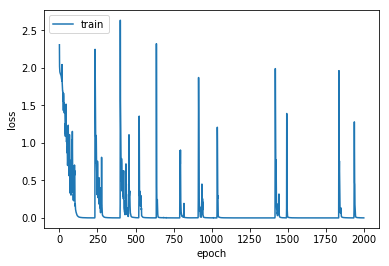

50/50 [==============================] - 0s 5ms/step
acc: 100.00%
one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [10]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset_X = []
    dataset_Y = []
    
    for i in range(len(seq)-window_size):
        
        subset = seq[i:(i+window_size+1)]
        
        for si in range(len(subset)-1):
            features = code2features(subset[si])            
            dataset_X.append(features)

        dataset_Y.append([code2idx[subset[window_size]]])
        
    return np.array(dataset_X), np.array(dataset_Y)

# 속성 변환 함수
def code2features(code):
    features = []
    features.append(code2scale[code[0]]/float(max_scale_value))
    features.append(code2length[code[1]])
    return features

# 1. 데이터 준비하기

# 코드 사전 정의

code2scale = {'c':0, 'd':1, 'e':2, 'f':3, 'g':4, 'a':5, 'b':6}
code2length = {'4':0, '8':1}

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

max_scale_value = 6.0
    
# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기

x_train, y_train = seq2dataset(seq, window_size = 4)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 2))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 2), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))
    
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성
history.init()

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()
    
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

model.reset_states()

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in

seq_in_featrues = []

for si in seq_in:
    features = code2features(si)
    seq_in_featrues.append(features)

for i in range(pred_count):
    sample_in = np.array(seq_in_featrues)
    sample_in = np.reshape(sample_in, (1, 4, 2)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    
    features = code2features(idx2code[idx])
    seq_in_featrues.append(features)
    seq_in_featrues.pop(0)

model.reset_states()
    
print("full song prediction : ", seq_out)